## Vision Api kullanarak neler yapabileceğimizi inceleyelim... 
Öncelikle kullanacağımız paketleri indiriyoruz ve Azure portal'da oluşturduğumuz kaynağa bağlanıyoruz.

In [1]:
pip install --upgrade azure-cognitiveservices-vision-computervision

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

In [4]:
subscription_key = "95baaaa6907745a599748b83e84a9df4"
endpoint = "https://compvision01.cognitiveservices.azure.com/"

In [5]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

## Resim Tanımlama, Sınıflandırma, Etiketleme 
İstanbul manzarasının olduğu bu resmi gelin inceleyelim...

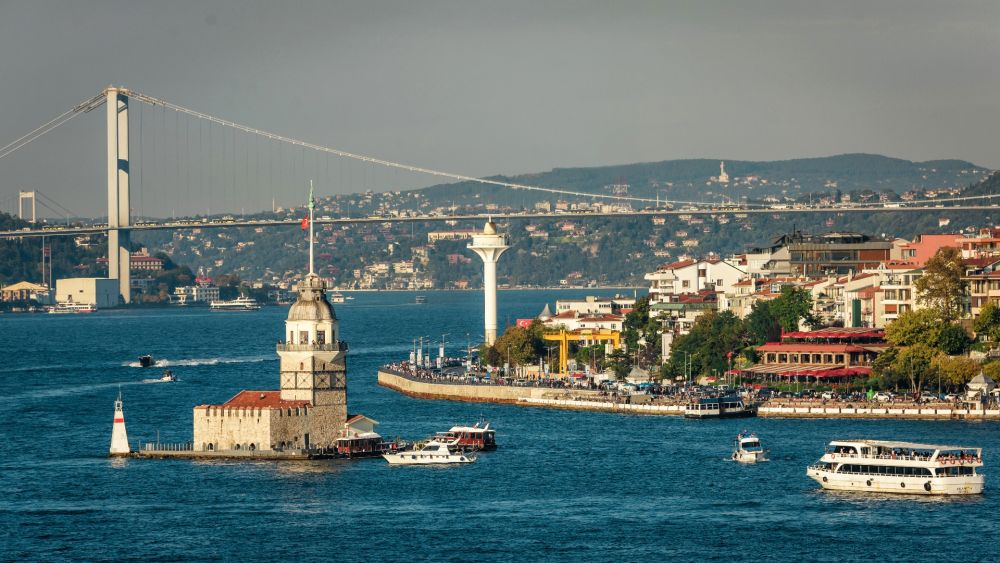

In [6]:
from IPython.display import Image
Image('https://www.3dkapla.com/pub/media/catalog/product/cache/0601a659ddf3b88cbab0f81f9d7dde65/m/a/man_000263.jpg')

In [7]:
remote_image_url = "https://www.3dkapla.com/pub/media/catalog/product/cache/0601a659ddf3b88cbab0f81f9d7dde65/m/a/man_000263.jpg"

In [8]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a bridge over water with boats and a city in the background' with confidence 45.42%


In [9]:
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'outdoor_' with confidence 14.45%
'outdoor_oceanbeach' with confidence 76.56%


In [10]:
'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'water' with confidence 99.70%
'outdoor' with confidence 99.27%
'watercraft' with confidence 96.43%
'boat' with confidence 94.64%
'harbor' with confidence 86.07%
'vehicle' with confidence 81.29%
'ship' with confidence 81.28%
'scene' with confidence 80.32%
'lake' with confidence 76.85%
'mountain' with confidence 72.34%
'sky' with confidence 71.19%
'sea' with confidence 36.01%
'traveling' with confidence 29.06%
'island' with confidence 18.89%
'day' with confidence 13.55%


## Objeleri Tespit Etme

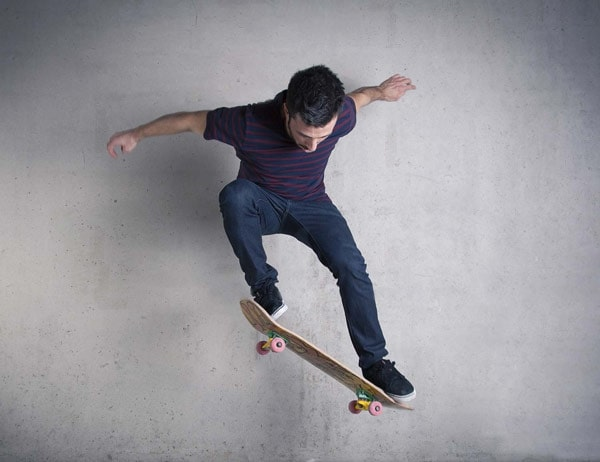

In [11]:
Image('https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg')

In [12]:
'''
Detect Objects - remote
This example detects different kinds of objects with bounding boxes in a remote image.
'''
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====
Detecting objects in remote image:
object at location 213, 365, 85, 208
object at location 218, 402, 179, 384
object at location 238, 417, 298, 416
object at location 116, 419, 60, 386


## Marka Tespit Etme 

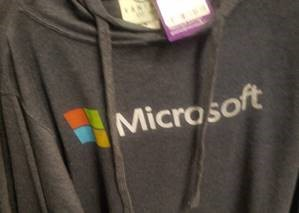

In [13]:
Image('https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg')

In [14]:
'''
Detect Brands - remote
This example detects common brands like logos and puts a bounding box around them.
'''
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149


## Yüzleri Tespit Etme 

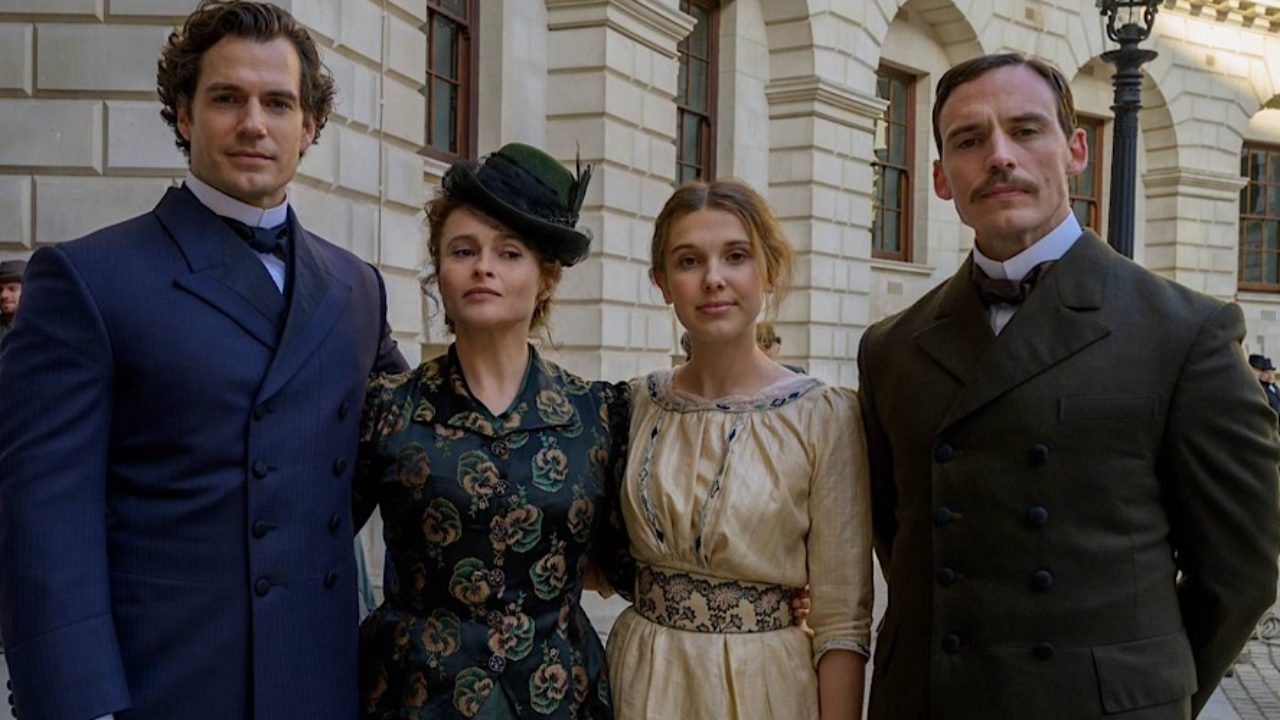

In [15]:
Image('https://www.hollywoodinsider.com/wp-content/uploads/2020/10/Hollywood-Insider-Netflix-Enola-Holmes-Millie-Bobby-Brown-Henry-Cavill-Sam-Clafflin-Helena-Bonham-Carter-1-1280x720.jpg')

In [16]:
'''
Detect Faces - remote
This example detects faces in a remote image, gets their gender and age, 
and marks them with a bounding box.
'''
print("===== Detect Faces - remote =====")
# Get an image with faces
remote_image_url_faces = "https://www.hollywoodinsider.com/wp-content/uploads/2020/10/Hollywood-Insider-Netflix-Enola-Holmes-Millie-Bobby-Brown-Henry-Cavill-Sam-Clafflin-Helena-Bonham-Carter-1-1280x720.jpg"
# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

===== Detect Faces - remote =====
Faces in the remote image: 
'Male' of age 37 at location 938, 101, 1063, 226
'Male' of age 34 at location 190, 67, 311, 188
'Female' of age 29 at location 662, 229, 766, 333
'Female' of age 34 at location 437, 224, 533, 320


## Yetişkin İçerik Tespiti

In [17]:
'''
Detect Adult or Racy Content - remote
This example detects adult or racy content in a remote image, then prints the adult/racy score.
The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.
'''
print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 0.52
Has racy content: False with confidence 1.35


## Baskın Renkler Tespiti

In [18]:
'''
Detect Color - remote
This example detects the different aspects of its color scheme in a remote image.
'''
print("===== Detect Color - remote =====")
# Select the feature(s) you want
remote_image_features = ["color"]
# Call API with URL and features
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results of color scheme
print("Getting color scheme of the remote image: ")
print("Is black and white: {}".format(detect_color_results_remote.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_remote.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_remote.color.dominant_colors))

===== Detect Color - remote =====
Getting color scheme of the remote image: 
Is black and white: False
Accent color: AD5D1E
Dominant background color: Grey
Dominant foreground color: Grey
Dominant colors: ['Grey']


## Etki Alanına Özgü İçeriği Algılama
Bu örnek, uzak görüntülerde ünlüleri ve önemli noktaları tespit eder.

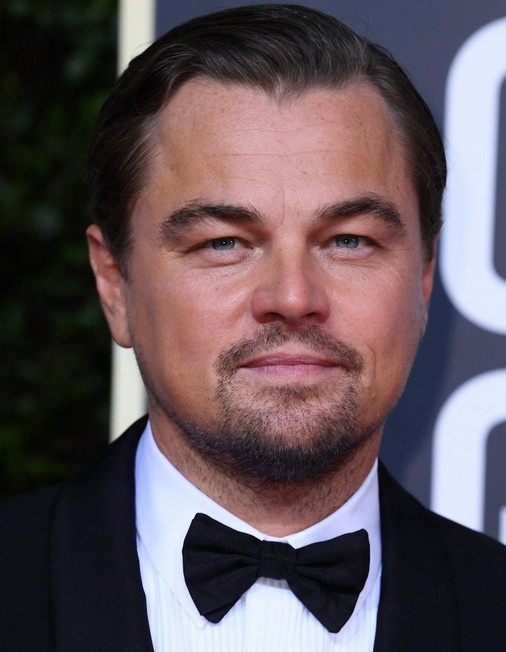

In [19]:
Image('https://resizing.flixster.com/eSrEPooElA53YIe489a-xQqHp-E=/506x652/v2/https://flxt.tmsimg.com/v9/AllPhotos/435/435_v9_bc.jpg')

In [20]:
'''
Detect Domain-specific Content - remote
This example detects celebrites and landmarks in remote images.
'''
print("===== Detect Domain-specific Content - remote =====")
# URL of one or more celebrities
remote_image_url_celebs = "https://resizing.flixster.com/eSrEPooElA53YIe489a-xQqHp-E=/506x652/v2/https://flxt.tmsimg.com/v9/AllPhotos/435/435_v9_bc.jpg"
# Call API with content type (celebrities) and URL
detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", remote_image_url_celebs)

# Print detection results with name
print("Celebrities in the remote image:")
if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
        print(celeb["name"])

===== Detect Domain-specific Content - remote =====
Celebrities in the remote image:
Leonardo DiCaprio


In [21]:
# Call API with content type (landmarks) and URL
detect_domain_results_landmarks = computervision_client.analyze_image_by_domain("landmarks", remote_image_url)
print()

print("Landmarks in the remote image:")
if len(detect_domain_results_landmarks.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmarks.result["landmarks"]:
        print(landmark["name"])


Landmarks in the remote image:
No landmarks detected.


## Resim Tipi Tespiti

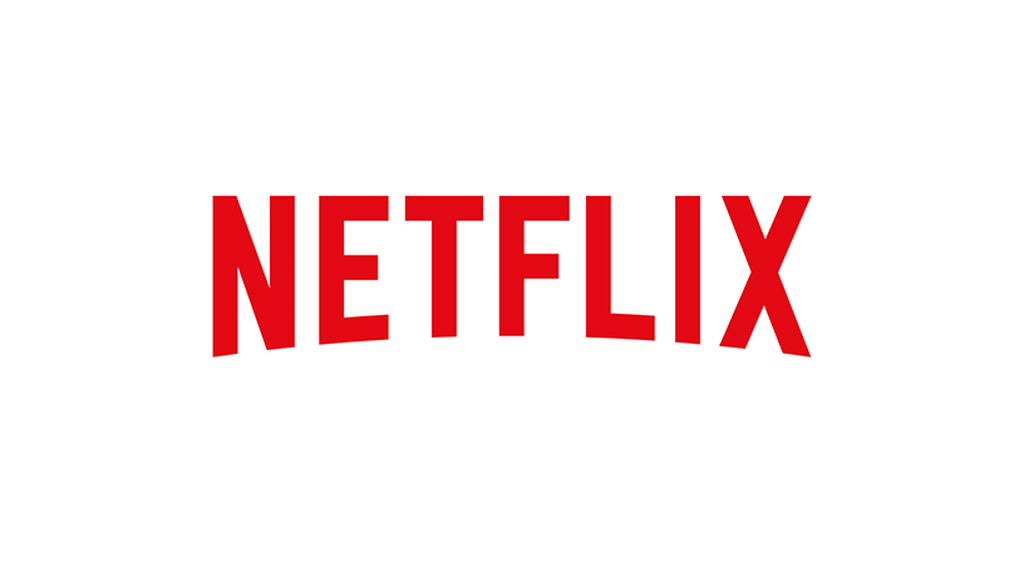

In [22]:
Image("https://pazarlamasyon.com/wp-content/uploads/2018/12/Netflix.png")

In [23]:
'''
Detect Image Types - remote
This example detects an image's type (clip art/line drawing).
'''
print("===== Detect Image Types - remote =====")
# Get URL of an image with a type
remote_image_url_type = "https://pazarlamasyon.com/wp-content/uploads/2018/12/Netflix.png"
# Select visual feature(s) you want
remote_image_features = [VisualFeatureTypes.image_type]
# Call API with URL and features
detect_type_results_remote = computervision_client.analyze_image(remote_image_url_type, remote_image_features)

# Prints type results with degree of accuracy
print("Type of remote image:")
if detect_type_results_remote.image_type.clip_art_type == 0:
    print("Image is not clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 2:
    print("Image is normal clip art.")
else:
    print("Image is good clip art.")

if detect_type_results_remote.image_type.line_drawing_type == 0:
    print("Image is not a line drawing.")
else:
    print("Image is a line drawing")

===== Detect Image Types - remote =====
Type of remote image:
Image is not clip art.
Image is not a line drawing.


## Resim Okuma 
Bu örnek, bir görüntüdeki el yazısı metni çıkaracak ve ardından sonuçları satır satır yazdıracaktır.

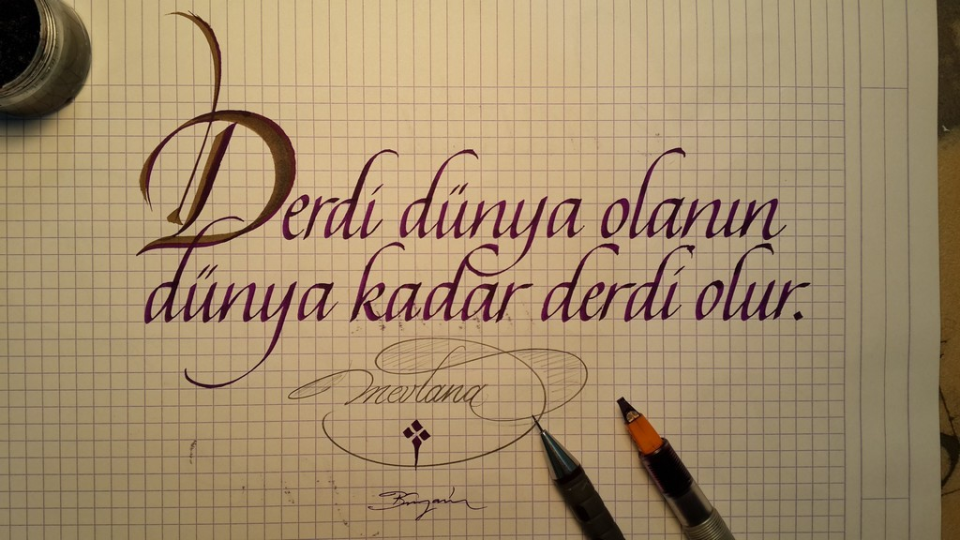

In [28]:
Image("https://images.gencgonulluler.gov.tr/public/41832.jpg")

In [29]:
'''
Batch Read File, recognize handwritten text - remote
This example will extract handwritten text in an image, then print results, line by line.
This API call can also recognize handwriting (not shown).
'''
print("===== Batch Read File - remote =====")
# Get an image with handwritten text
remote_image_handw_text_url = "https://images.gencgonulluler.gov.tr/public/41832.jpg"

# Call API with URL and raw response (allows you to get the operation location)
recognize_handw_results = computervision_client.read(remote_image_handw_text_url,  raw=True)

===== Batch Read File - remote =====


In [30]:
# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_handw_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_handw_text_results = computervision_client.get_read_result(operation_id)
    if get_handw_text_results.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_handw_text_results.status == OperationStatusCodes.succeeded:
    for text_result in get_handw_text_results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

Derdi dunya olarun
[210.0, 140.0, 789.0, 151.0, 787.0, 248.0, 208.0, 244.0]
dunya kadar derdi olur.
[135.0, 253.0, 805.0, 247.0, 806.0, 327.0, 135.0, 331.0]
Dnalang
[290.0, 368.0, 487.0, 370.0, 487.0, 410.0, 289.0, 406.0]

